In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bearing-data/B021_2.mat
/kaggle/input/bearing-data/B028_3.mat
/kaggle/input/bearing-data/IR007_3.mat
/kaggle/input/bearing-data/IR014_3.mat
/kaggle/input/bearing-data/OR00712_2.mat
/kaggle/input/bearing-data/IR028_2.mat
/kaggle/input/bearing-data/B014_3.mat
/kaggle/input/bearing-data/IR014_0.mat
/kaggle/input/bearing-data/IR007_2.mat
/kaggle/input/bearing-data/OR0073_1.mat
/kaggle/input/bearing-data/Normal_3.mat
/kaggle/input/bearing-data/IR028_0.mat
/kaggle/input/bearing-data/B021_1.mat
/kaggle/input/bearing-data/B028_1.mat
/kaggle/input/bearing-data/IR014_1.mat
/kaggle/input/bearing-data/Normal_1.mat
/kaggle/input/bearing-data/OR0076_1.mat
/kaggle/input/bearing-data/B007_1.mat
/kaggle/input/bearing-data/B014_0.mat
/kaggle/input/bearing-data/OR0146_2.mat
/kaggle/input/bearing-data/B014_1.mat
/kaggle/input/bearing-data/OR0216_3.mat
/kaggle/input/bearing-data/B028_0.mat
/kaggle/input/bearing-data/OR02112_2.mat
/kaggle/input/bearing-data/B007_3.mat
/kaggle/input/bearing-dat

In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram
from scipy.stats import kurtosis, skew
from tqdm import tqdm
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

100%|██████████| 64/64 [00:01<00:00, 43.57it/s]


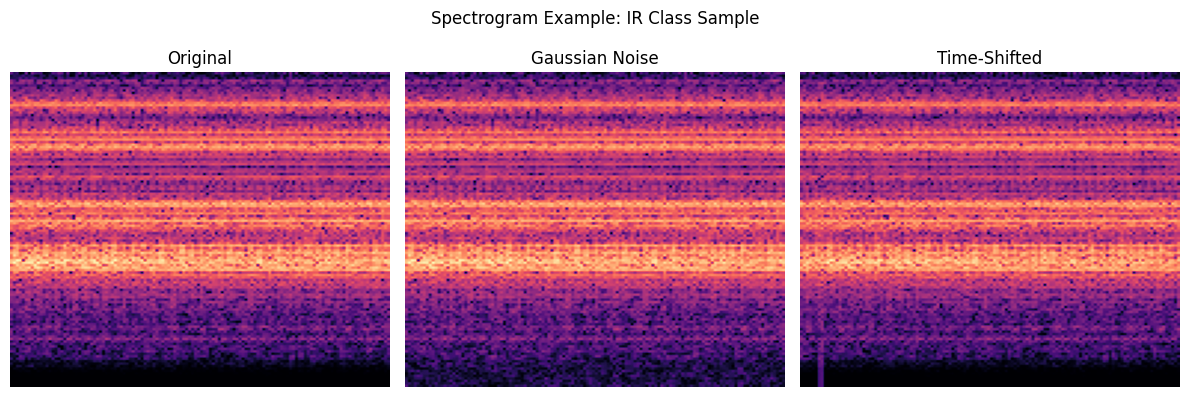

Final dataset:
Total samples: 444
Image shape: (128, 128, 1)
Label distribution: {0: 84, 1: 96, 2: 168, 3: 96}


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_167 (Conv2D)                  │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_167              │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_167 (MaxPooling2D)     │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_168 (Conv2D)                  │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_168              │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_168 (MaxPooling2D)     │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_169 (Conv2D)                  │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_169              │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_169 (MaxPooling2D)     │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_56 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,516 (16.36 MB)

 Trainable params: 4,288,068 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.4123 - loss: 7.9954 - val_accuracy: 0.2222 - val_loss: 11.2967
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7850 - loss: 0.6470 - val_accuracy: 0.2222 - val_loss: 19.4707
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9355 - loss: 0.1802 - val_accuracy: 0.2222 - val_loss: 15.5298
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9469 - loss: 0.1555 - val_accuracy: 0.2222 - val_loss: 11.7880
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9544 - loss: 0.1321 - val_accuracy: 0.2222 - val_loss: 8.2273
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9978 - loss: 0.0404 - val_accuracy: 0.2222 - val_loss: 6.6109
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9784 - loss: 0.0580 - val_accuracy: 0.2222 - val_loss: 4.7582
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.222

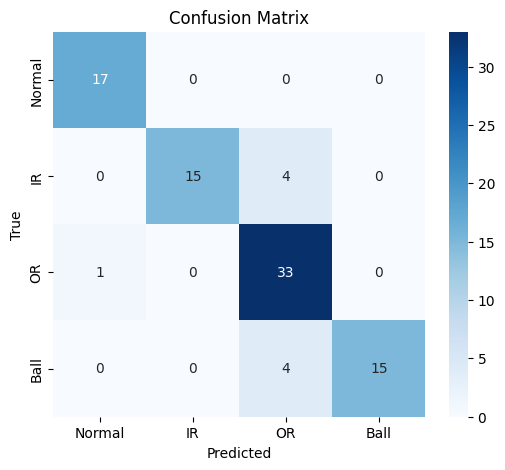

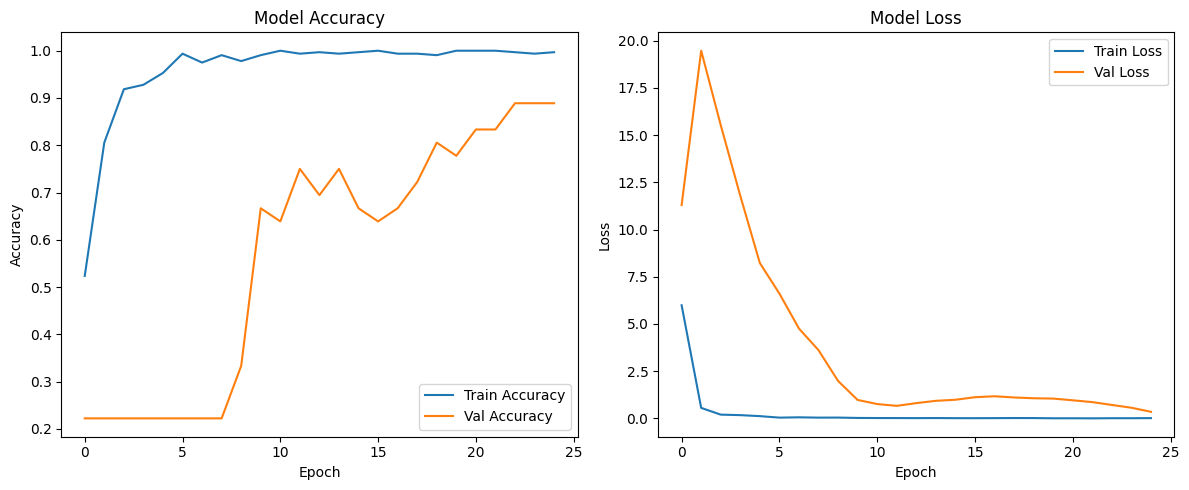

In [57]:
# Optimized and Production-Ready Code for Bearing Health Classification (Classic Split)

import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return 1
    if "OR" in filename: return 2
    if "B0" in filename: return 3
    if "Normal" in filename or "97" in filename: return 0
    return -1

# --- Segment Signal ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Convert to Spectrogram ---
def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

# --- Load and Augment Dataset ---
X, y = [], []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    try:
        label = classify_file(os.path.basename(filepath))
        if label == -1:
            continue

        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            # Original segment
            X.append(segment_to_spectrogram(seg, sampling_rate, out_shape))
            y.append(label)

            # Augmentation 1: Add Gaussian noise
            noisy = seg + np.random.normal(0, 0.08, size=seg.shape)
            X.append(segment_to_spectrogram(noisy, sampling_rate, out_shape))
            y.append(label)

            # Augmentation 2: Random time shift (stronger)
            shift_amt = np.random.randint(8000, 24000)
            shifted = np.roll(seg, shift_amt)
            X.append(segment_to_spectrogram(shifted, sampling_rate, out_shape))
            y.append(label)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

# --- Prepare Dataset ---
X = np.array(X)[..., np.newaxis]  # Shape: (samples, 128, 128, 1)
# ------------------- Visualize Spectrogram Augmentations -------------------
def plot_spectrogram_examples():
    sample_file = next((f for f in mat_files if classify_file(os.path.basename(f)) == 1), None)
    if sample_file:
        data = loadmat(sample_file)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segment = segment_signal(signal, sampling_rate, window_sec)[0]

        # Generate variants
        original_spec = segment_to_spectrogram(segment, sampling_rate, out_shape)
        noisy_spec = segment_to_spectrogram(segment + np.random.normal(0, 0.015, size=segment.shape), sampling_rate, out_shape)
        shifted_spec = segment_to_spectrogram(np.roll(segment, 1000), sampling_rate, out_shape)

        # Plot
        titles = ["Original", "Gaussian Noise", "Time-Shifted"]
        specs = [original_spec, noisy_spec, shifted_spec]

        plt.figure(figsize=(12, 4))
        for i, (spec, title) in enumerate(zip(specs, titles)):
            plt.subplot(1, 3, i + 1)
            plt.imshow(spec, aspect='auto', cmap='magma')
            plt.title(title)
            plt.axis('off')
        plt.suptitle("Spectrogram Example: IR Class Sample")
        plt.tight_layout()
        plt.show()

plot_spectrogram_examples()

y = np.array(y)

print("Final dataset:")
print("Total samples:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Label distribution:", pd.Series(y).value_counts().sort_index().to_dict())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Improved CNN Model ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- Training ---
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

# --- Evaluation ---
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'IR', 'OR', 'Ball'],
            yticklabels=['Normal', 'IR', 'OR', 'Ball'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Training History Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
